In [2]:
import pandas as pd
import pandas_datareader as web
from pandas.util.testing import assert_frame_equal
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

/Users/jazmiahenry/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [7]:
df = web.DataReader('^GSPC', data_source = 'yahoo', start = '2009', end = '2019')

In [8]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-01-02,934.729980,899.349976,902.989990,931.799988,4048270000,931.799988
2009-01-05,936.630005,919.530029,929.169983,927.450012,5413910000,927.450012
2009-01-06,943.849976,927.280029,931.169983,934.700012,5392620000,934.700012
2009-01-07,927.450012,902.369995,927.450012,906.650024,4704940000,906.650024
2009-01-08,910.000000,896.809998,905.729980,909.729980,4991550000,909.729980


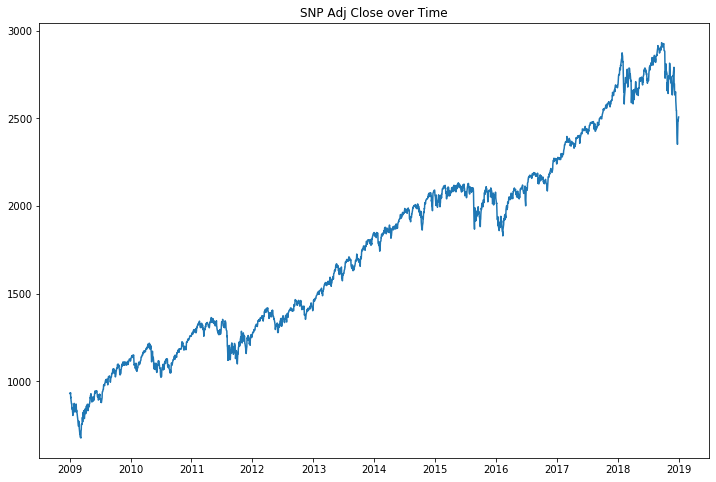

In [9]:
plt.figure(figsize=(12, 8))
plt.title('SNP Adj Close over Time')
plt.plot(df['Adj Close'])
plt.xlabel=('Date')
plt.ylabel=('Adj Close')
plt.show()

In [10]:
df = df.filter(['Adj Close'])
df

,Adj Close
Date,
2009-01-02,931.799988
2009-01-05,927.450012
2009-01-06,934.700012
2009-01-07,906.650024
2009-01-08,909.729980
...,...
2018-12-24,2351.100098
2018-12-26,2467.699951
2018-12-27,2488.830078


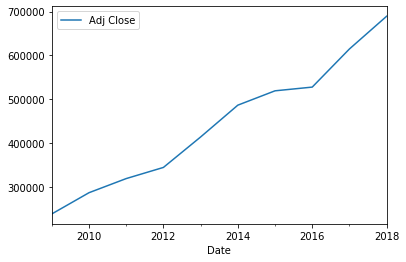

In [12]:
data1 = df.resample('Y').sum()
data1.plot()

In [13]:
data1

,Adj Close
Date,
2009-12-31,238907.689758
2010-12-31,287271.309143
2011-12-31,319444.979980
2012-12-31,344838.539917
2013-12-31,414237.339966
2014-12-31,486706.779663
2015-12-31,519389.070801
2016-12-31,527852.118530
2017-12-31,614718.171143


In [14]:
import world_bank_data as wb

In [15]:
wb.get_topics()

,value,sourceNote
id,,
1,Agriculture & Rural Development,For the 70 percent of the world's poor who liv...
2,Aid Effectiveness,Aid effectiveness is the impact that aid has i...
3,Economy & Growth,Economic growth is central to economic develop...
4,Education,Education is one of the most powerful instrume...
5,Energy & Mining,The world economy needs ever-increasing amount...
6,Environment,Natural and man-made environmental resources –...
7,Financial Sector,An economy's financial markets are critical to...
8,Health,Improving health is central to the Millennium ...
9,Infrastructure,Infrastructure helps determine the success of ...


In [16]:
wb.get_indicators(topic=3, country='US')

,name,unit,source,sourceNote,sourceOrganization,topics
id,,,,,,
5.0.AMeanIncGr.All,Annualized Mean Income Growth (2004-2014),,LAC Equity Lab,The official indicator to monitor shared prosp...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,Economy & Growth
5.0.AMeanIncGr.B40,Annualized Mean Income Growth Bottom 40 Percen...,,LAC Equity Lab,The indicator to monitor shared prosperity is ...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,Economy & Growth
5.1.AMeanIncGr.All,Annualized Mean Income Growth (2004-2009),,LAC Equity Lab,The indicator to monitor shared prosperity is ...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,Economy & Growth
5.1.AMeanIncGr.B40,Annualized Mean Income Growth Bottom 40 Percen...,,LAC Equity Lab,The indicator to monitor shared prosperity is ...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,Economy & Growth
5.2.AMeanIncGr.All,Annualized Mean Income Growth (2009-2014),,LAC Equity Lab,The indicator to monitor shared prosperity is ...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,Economy & Growth
...,...,...,...,...,...,...
PA.NUS.PPP,"PPP conversion factor, GDP (LCU per internatio...",,World Development Indicators,Purchasing power parity (PPP) conversion facto...,"International Comparison Program, World Bank |...",Economy & Growth
PA.NUS.PPP.05,"2005 PPP conversion factor, GDP (LCU per inter...",,WDI Database Archives,Purchasing power parity conversion factor is t...,"World Bank, International Comparison Program d...",Economy & Growth
PA.NUS.PPPC.RF,Price level ratio of PPP conversion factor (GD...,,World Development Indicators,Price level ratio is the ratio of a purchasing...,"International Comparison Program, World Bank |...",Economy & Growth


In [17]:
data = wb.get_series(indicator='NY.GDP.PCAP.KD', country=['US'], date = '2009:2018', id_or_value='id', simplify_index=True)

In [18]:
print(data)

Year
2009    47648.813250
2010    48467.515777
2011    48866.053277
2012    49603.253474
2013    50171.237133
2014    51028.824895
2015    52116.738813
2016    52555.518032
2017    53382.764823
2018    54659.198268
Name: NY.GDP.PCAP.KD, dtype: float64


In [19]:
df2 = data.to_frame()

In [20]:
df2

,NY.GDP.PCAP.KD
Year,
2009,47648.813250
2010,48467.515777
2011,48866.053277
2012,49603.253474
2013,50171.237133
2014,51028.824895
2015,52116.738813
2016,52555.518032
2017,53382.764823


In [21]:
for col in df2.columns: 
    print(col)

NY.GDP.PCAP.KD


In [22]:
df2['GDP'] = df2['NY.GDP.PCAP.KD']

In [23]:
df2

,NY.GDP.PCAP.KD,GDP
Year,,
2009,47648.813250,47648.813250
2010,48467.515777,48467.515777
2011,48866.053277,48866.053277
2012,49603.253474,49603.253474
2013,50171.237133,50171.237133
2014,51028.824895,51028.824895
2015,52116.738813,52116.738813
2016,52555.518032,52555.518032
2017,53382.764823,53382.764823


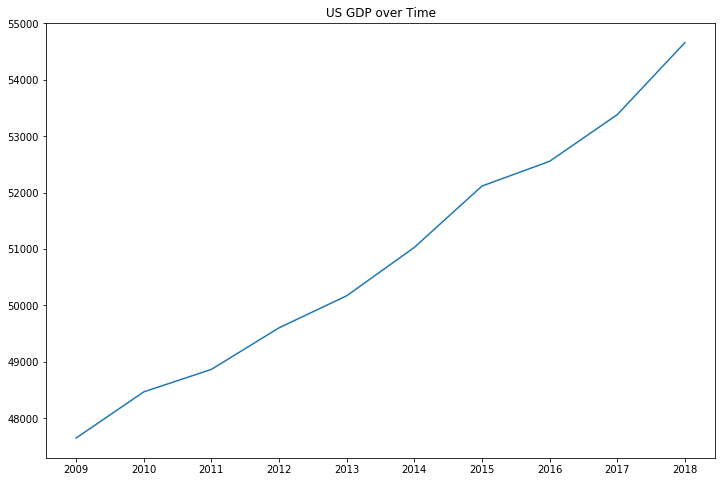

In [24]:
plt.figure(figsize=(12, 8))
plt.title('US GDP over Time')
plt.plot(df2['GDP'])
plt.xlabel=('Year')
plt.ylabel=('GDP')
plt.show()

In [28]:
data2 =df2.filter(['GDP'])
data2

,GDP
Year,
2009,47648.813250
2010,48467.515777
2011,48866.053277
2012,49603.253474
2013,50171.237133
2014,51028.824895
2015,52116.738813
2016,52555.518032
2017,53382.764823


In [ ]:
#Linear Regression

In [29]:
dataset = data1.values
dataset2 = data2.values

In [41]:
X = dataset.reshape(-1,1)
Y = dataset2.reshape(-1,1)

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [43]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
print(regressor.intercept_)

[43989.07272366]


In [45]:
print(regressor.coef_)

[[0.01548767]]


In [46]:
y_pred = regressor.predict(X_test)

In [47]:
reg_df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten()})
reg_df

,Actual,Predicted
0,48866.053277,48936.529998
1,53382.764823,53509.622671


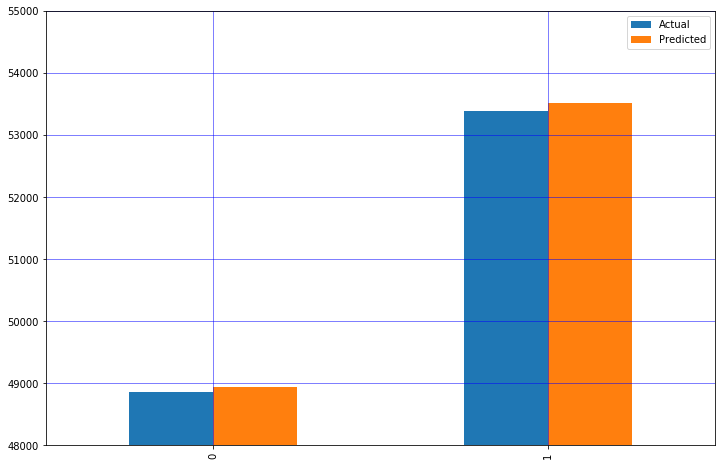

In [53]:
reg_df.plot(kind='bar',figsize=(12,8))
plt.ylim(48000, 55000)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='orange')
plt.show()